In [30]:
import sys
!{sys.executable} -m pip install efficient_apriori
!{sys.executable} -m pip install seaborn

In [31]:
import pandas as pd
import numpy as np
import glob as gl
import pickle
from efficient_apriori import apriori
import matplotlib.pyplot as plt

import warnings
import os
import pathlib
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [32]:
mainLog = pd.read_csv('log_MRsChecker.csv', index_col=0)
mainLog_aux = mainLog.copy()

In [33]:
column_names = list(mainLog.keys())
print(column_names)

['id', 'input_a', 'input_b', 'output_add', 'output_sub', 'output_add_MR1', 'output_sub_MR1', 'output_add_MR2', 'output_sub_MR2', 'output_add_MR3', 'output_sub_MR3', 'output_add_MR4', 'output_sub_MR4', 'MR1_checker_add', 'MR2_checker_add', 'MR3_checker_add', 'MR4_checker_add', 'MR1_checker_sub', 'MR2_checker_sub', 'MR3_checker_sub', 'MR4_checker_sub']


In [34]:
add = mainLog_aux[['id', 'input_a', 'input_b', 'output_add', 'output_add_MR1', 'output_add_MR2', 'output_add_MR3', 'output_add_MR4', 'MR1_checker_add', 'MR2_checker_add', 'MR3_checker_add', 'MR4_checker_add']]

In [35]:
sub = mainLog_aux[['id', 'input_a', 'input_b', 'output_sub', 'output_sub_MR1', 'output_sub_MR2','output_sub_MR3', 'output_sub_MR4', 'MR1_checker_sub', 'MR2_checker_sub', 'MR3_checker_sub', 'MR4_checker_sub']]

In [36]:
add.input_a.value_counts()

0    484
5     98
8     72
4     67
2     64
9     55
6     48
7     40
3     37
1     35
Name: input_a, dtype: int64

<AxesSubplot:xlabel='input_b', ylabel='count'>

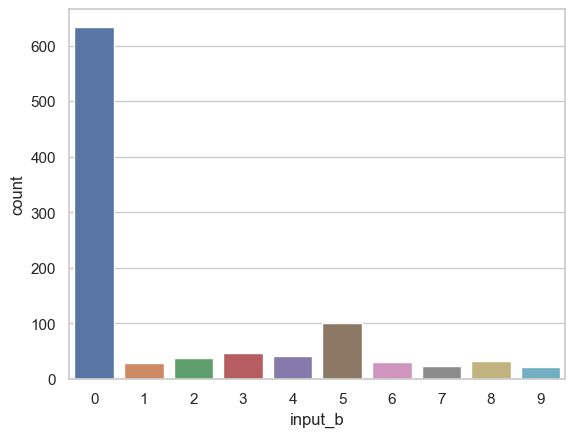

In [37]:
sns.set_theme(style="whitegrid")
sns.countplot(x=add.input_b)

<AxesSubplot:xlabel='input_a', ylabel='count'>

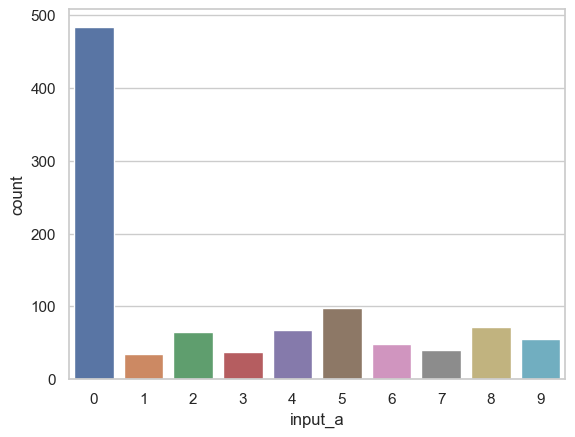

In [38]:
sns.set_theme(style="whitegrid")
sns.countplot(x=add.input_a)

In [39]:
df_count_MR1_add = add.MR1_checker_add.value_counts()
df_count_MR2_add = add.MR2_checker_add.value_counts()
df_count_MR3_add = add.MR3_checker_add.value_counts()
df_count_MR4_add = add.MR4_checker_add.value_counts()

In [40]:
df_count_MR1_sub = sub.MR1_checker_sub.value_counts()
df_count_MR2_sub = sub.MR2_checker_sub.value_counts()
df_count_MR3_sub = sub.MR3_checker_sub.value_counts()
df_count_MR4_sub = sub.MR4_checker_sub.value_counts()

In [41]:
df_count_MR1_sub


Violated       571
No-violated    429
Name: MR1_checker_sub, dtype: int64